In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Reading the file from drive
df = pd.read_csv('AIRBNB_NYC_2019.csv')

In [ ]:
#to display first five observations
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [ ]:
#to better understand the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#checking for duplicates
df.nunique()

id                                48895
name                              47896
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
#check number of missing records in each column
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# **DATA CLEANING**

In [ ]:
#Replacing spaces with underscore and converting everything to lower case.
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [ ]:
#Handling Missing Values and replacing with approriate values
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)
df['last_review'].fillna('Unknown', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

df.head()
#can validate from excel sheet


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Unknown,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [ ]:
'''
one-hot encoded is for converting categorical value into a form
that can be worked on with ML algorithms.
'''
# Selecting the categorical columns to be one-hot encoded
categorical_columns = ['room_type', 'neighbourhood_group']

# Applying one-hot encoding
# We drop first to avoid dummy variable (n-1)
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = encoder.fit_transform(df[categorical_columns])
encoded_cols


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.]])

In [ ]:
# Converting the encoded columns back to a dataframe
encoded_cols_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_columns))
encoded_cols_df


,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
48890,1.0,0.0,1.0,0.0,0.0,0.0
48891,1.0,0.0,1.0,0.0,0.0,0.0
48892,0.0,0.0,0.0,1.0,0.0,0.0
48893,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Concatenating the original dataframe with the new one-hot encoded columns
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_cols_df], axis=1)
df_encoded.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,19/10/2018,0.21,6,365,1.0,0.0,1.0,0.0,0.0,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,21/05/2019,0.38,2,355,0.0,0.0,0.0,1.0,0.0,0.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,Unknown,0.00,1,365,1.0,0.0,0.0,1.0,0.0,0.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,05/07/2019,4.64,1,194,0.0,0.0,1.0,0.0,0.0,0.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,19/11/2018,0.10,1,0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#Date Transformation
# Convert 'last_review' to datetime, handling "Unknown" as NaT (Not a Time)
df_encoded['last_review'] = pd.to_datetime(df_encoded['last_review'], errors='coerce')

'''
'coerce': This is the option used in our code. What it does is it converts
any values that can't be transformed into a datetime object into
NaT (Not a Time), which is Pandas' way of representing missing or null
date/time values.
'''
# checking if data is cleaned and transformed
print(df_encoded.head())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood  latitude  longitude  price  minimum_nights  \
0         John    Kensington  40.64749  -73.97237    149               1   
1     Jennifer       Midtown  40.75362  -73.98377    225               1   
2    Elisabeth        Harlem  40.80902  -73.94190    150               3   
3  LisaRoxanne  Clinton Hill  40.68514  -73.95976     89               1   
4        Laura   East Harlem  40.79851  -73.94399     80              10   

   number_of_reviews last_review  reviews_per_month  \
0                  9  2018-10-19               0.21   
1           

<ipython-input-15-8aa631c5c70b>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_encoded['last_review'] = pd.to_datetime(df_encoded['last_review'], errors='coerce')


In [ ]:
# Calculate mean excluding 0 values
mean_value = df_encoded[df_encoded['price'] != 0]['price'].mean()

#rounding off to nearest whole number
mean_value_rounded = round(mean_value)
# mean_value_rounded is 153

#Replacing all 0's with the rounded mean
df_encoded['price'] = df_encoded['price'].replace(0, mean_value_rounded)
df_encoded

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,room_type_Shared room,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,1.0,0.0,1.0,0.0,0.0,0.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0.0,0.0,0.0,1.0,0.0,0.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,NaT,0.00,1,365,1.0,0.0,0.0,1.0,0.0,0.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,0.0,0.0,1.0,0.0,0.0,0.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Bedford-Stuyvesant,40.67853,-73.94995,70,2,0,NaT,0.00,2,9,1.0,0.0,1.0,0.0,0.0,0.0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Bushwick,40.70184,-73.93317,40,4,0,NaT,0.00,2,36,1.0,0.0,1.0,0.0,0.0,0.0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Harlem,40.81475,-73.94867,115,10,0,NaT,0.00,1,27,0.0,0.0,0.0,1.0,0.0,0.0
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Hell's Kitchen,40.75751,-73.99112,55,1,0,NaT,0.00,6,2,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# just for validation
print(df_encoded.loc[5277])

id                                               3816499
name                                                   2
host_id                                            23633
host_name                                         Eugene
neighbourhood                                   Bushwick
latitude                                        40.70315
longitude                                      -73.93124
price                                                 75
minimum_nights                                         2
number_of_reviews                                      2
last_review                          2015-11-01 00:00:00
reviews_per_month                                   0.04
calculated_host_listings_count                         2
availability_365                                       0
room_type_Private room                               1.0
room_type_Shared room                                0.0
neighbourhood_group_Brooklyn                         1.0
neighbourhood_group_Manhattan  

In [ ]:
# Remove rows from 'name' column where the value consists solely of numbers
df_encoded = df_encoded[~df_encoded['name'].str.isnumeric()]
df_encoded = df_encoded[~df_encoded['host_name'].str.isnumeric()]

In [ ]:
df_encoded.shape
# there is difference in records, initally (48895,16)

(48884, 20)

In [ ]:
df_encoded.to_csv('data.csv', index=False)

Research question-1: How does the average price vary across different neighborhoods and room types?

In [ ]:
# Step 1: Transform the one-hot encoded room types back into a single 'room_type' column for readability
df_encoded['room_type'] = df_encoded.apply(lambda row: 'Private room' if row['room_type_Private room'] == 1 else ('Shared room' if row['room_type_Shared room'] == 1 else 'Entire home/apt'), axis=1)

# Step 2 and 3: Group by neighbourhood and room_type, then calculate the average price
average_prices = df_encoded.groupby(['neighbourhood', 'room_type'])['price'].mean().reset_index()

average_prices.head()


,neighbourhood,room_type,price
0,Allerton,Entire home/apt,123.062500
1,Allerton,Private room,65.769231
2,Arden Heights,Entire home/apt,76.000000
3,Arden Heights,Private room,41.000000
4,Arrochar,Entire home/apt,189.700000


In [ ]:
print ("Maximum of average :", average_prices.max())
print ("Minimum of average: ", average_prices.min())

Maximum of average : neighbourhood       Woodside
room_type        Shared room
price                  803.5
dtype: object
Minimum of average:  neighbourhood           Allerton
room_type        Entire home/apt
price                       13.0
dtype: object


<ipython-input-23-f8ecfdb7aeaf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(average_prices, x='price', y='room_type', inner='box', palette='Dark2')


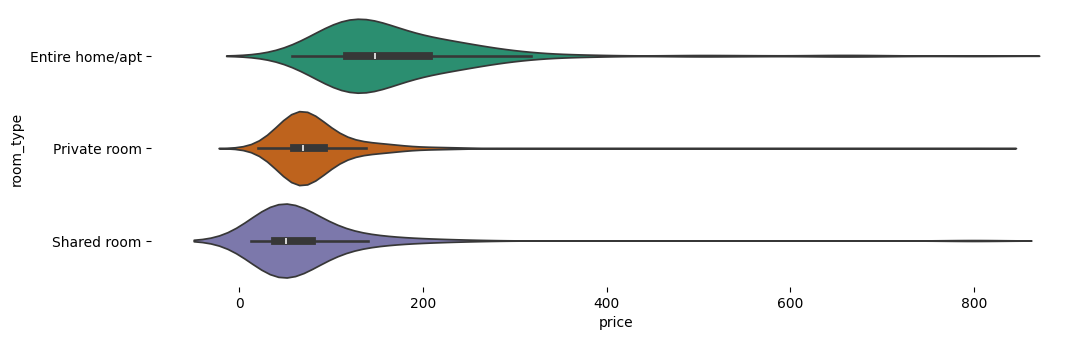

In [ ]:
# @title room_type vs price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(average_prices['room_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(average_prices, x='price', y='room_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Research Question-2: How do reviews and their frequency influence a listing’s price and occupancy rates?


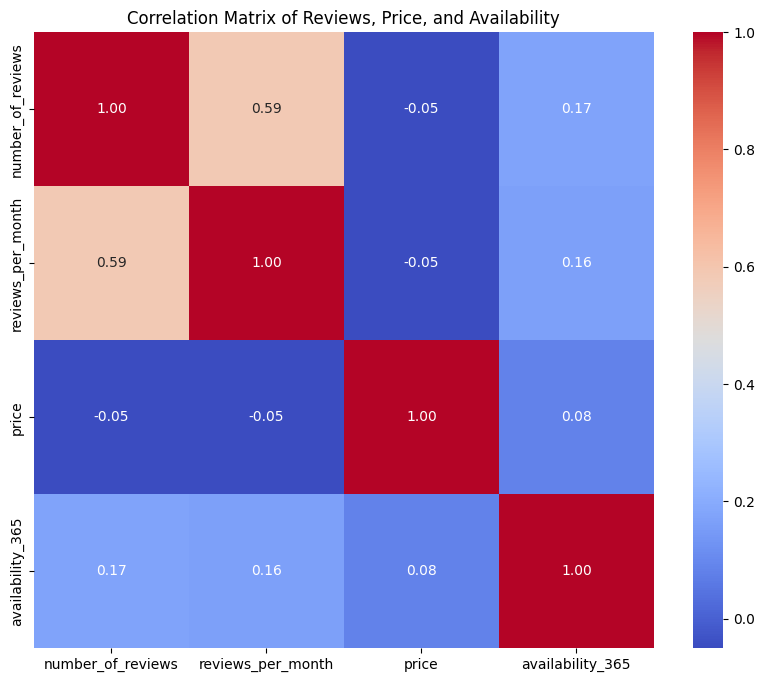

In [ ]:
# Assuming 'df_encoded' is loaded and contains the relevant columns

# Let's start with calculating the correlation coefficients
correlation_matrix = df_encoded[['number_of_reviews', 'reviews_per_month', 'price', 'availability_365']].corr()

# Visualizing the correlation with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Reviews, Price, and Availability")
plt.show()

#

A weak positive correlation indicates that, although both variables tend to go up in response to one another, the relationship is not very strong.

Research Question-3: What are the patterns in the spatial distribution of Airbnb listings across NYC's neighborhoods?


In [ ]:
import folium #allows you to create interactive geographic visualizations, helps create maps, popups etc.
from folium.plugins import HeatMap

# Assuming you have already cleaned and prepared your DataFrame named 'df'
# And it includes 'latitude', 'longitude', 'neighbourhood_group', and 'price' columns

# Create a base map of New York City
nyc_coordinates = [40.7128, -74.0060]
nyc_map = folium.Map(location=nyc_coordinates, zoom_start=12) #Takes the locations of the Airbnb listings and makes a heatmap. Areas with more listings will appear more intensely colored.

# Define a color scheme for the neighborhood groups
neighborhood_colors = {
    'Manhattan': 'red',
    'Brooklyn': 'green',
    'Queens': 'blue',
    'Bronx': 'purple',
    'Staten Island': 'orange'
}

# Sample the data if it's large to speed up the process
sampled_data = df.sample(n=1000) if len(df) > 1000 else df
#If there are more than 1000 Airbnb listings in the dataset, this line picks a random 1000 to make the map less cluttered. If there are fewer than 1000, it uses all of them.

# Add a heatmap layer to visualize the density of Airbnb listings
heatmap_data = sampled_data[['latitude', 'longitude']].values.tolist()
HeatMap(heatmap_data, radius=8).add_to(nyc_map) #Takes the locations of the Airbnb listings and makes a heatmap. Areas with more listings will appear more intensely colored.

# Add markers to the map with color based on the neighborhood group
for _, row in sampled_data.iterrows(): #This starts a loop over the rows of the sampled_data DataFrame. _ is a placeholder for the index of the row, which we're not using here. row contains the data for the current row.
    neighborhood_group = row['neighbourhood_group']
    folium.CircleMarker( #This creates a new CircleMarker object, which is a circular marker that will be placed on the map.
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=neighborhood_colors.get(neighborhood_group, 'black'),  # Default to black if not listed
        fill=True,
        fill_color=neighborhood_colors.get(neighborhood_group, 'black'),
        fill_opacity=0.6, #Sets the opacity of the fill color to 60%. An opacity of 100% would be completely opaque, while 0% would be completely transparent.
        popup=f"Neighborhood: {neighborhood_group}, Price: ${row['price']}"
    ).add_to(nyc_map)

# Add layer control to toggle the heatmap
folium.LayerControl().add_to(nyc_map) #Adds a control to the map that lets users turn different layers (like the heatmap) on or off.

nyc_map

#room types may be the reason around staten island.
#connectivity also.



The map helps people see where most Airbnbs are located in NYC. Areas with lots of dots have many places to rent, and different colors tell you about different parts of the city. If you were planning a trip and wanted to stay in a popular spot, you might look for a place in the red area. If you wanted somewhere quieter or less busy, you might pick a place with fewer dots.

Research Question-4: What is the distribution and popularity of different room types among Airbnb listings?

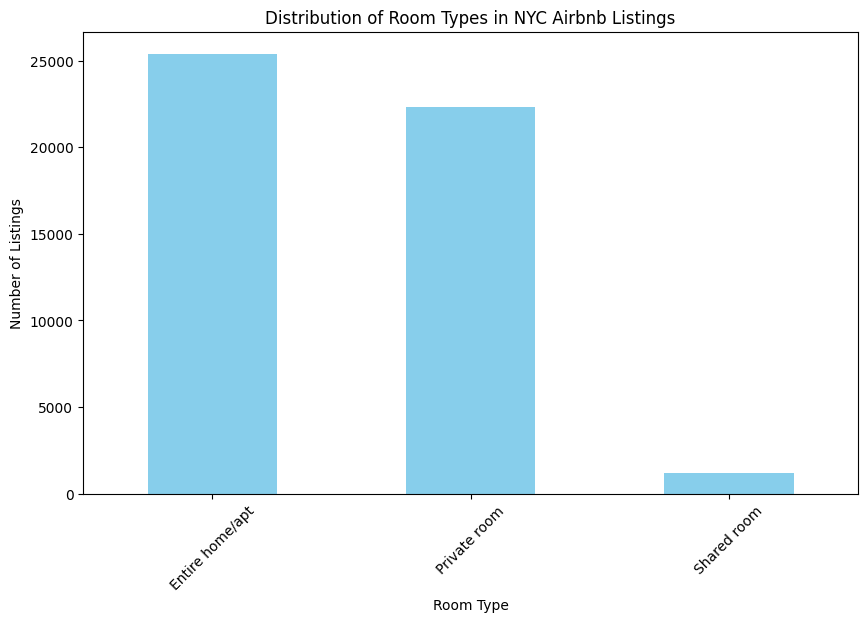

In [ ]:
# Assuming df_encoded is your DataFrame after cleaning and preparation
# Count the frequency of each room type
room_type_counts = df_encoded['room_type'].value_counts()

# Plotting the distribution of room types
plt.figure(figsize=(10, 6))
room_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Room Types in NYC Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

Research Question-5: How do the number of minimum nights and listing availability correlate with pricing strategies?

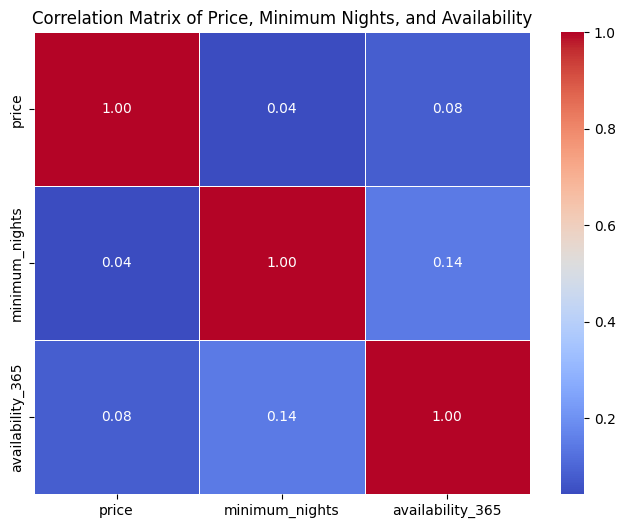

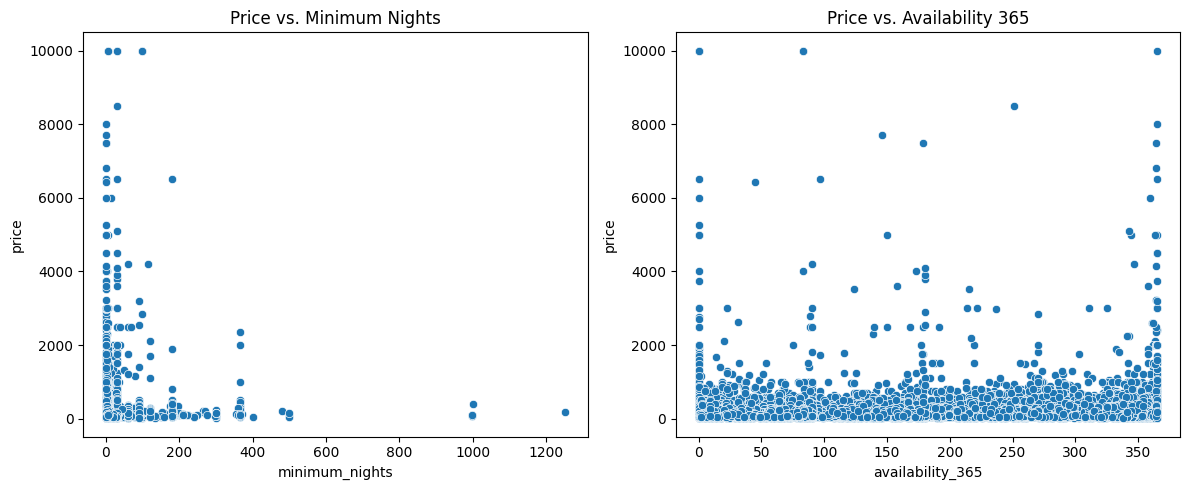

In [ ]:
# Calculate the correlation matrix for the relevant variables
correlation_matrix = df_encoded[['price', 'minimum_nights', 'availability_365']].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Price, Minimum Nights, and Availability')
plt.show()

# Additional scatter plots to visualize relationships
plt.figure(figsize=(12, 5))

# Scatter plot for Price vs. Minimum Nights
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='minimum_nights', y='price', data=df_encoded)
plt.title('Price vs. Minimum Nights')

# Scatter plot for Price vs. Availability
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='availability_365', y='price', data=df_encoded)
plt.title('Price vs. Availability 365')

plt.tight_layout()
plt.show()